In [24]:
import matplotlib.pyplot as plt
def part1(Xin,istar):
    """
    Sort list of integers in non-decreasing order
    Input:
    Xin: List of N integers
    istar: integer between 0 and N-1 (0<=istar<=N-1)
    Output:
    X: Sorted list
    """ 
    X = Xin.copy() 
    for i,x in enumerate(X[1:],1):
        if i<=istar:
            ind = 0
            for j in range(i-1,-1,-1):
                if x>=X[j]:
                    ind = j+1
                    break                   
        else:
            a = 0
            b = i-1
            while a <= b:
                c = (a+b) // 2
                if X[c] < x:
                    a = c + 1
                else:
                    b = c - 1
            ind = a
        
        X[ind+1:i+1] = X[ind:i]
        X[ind] = x

    return X


def part1_time(N, coef):
    """Examine dependence of walltimes of part1 function on N and istar
        You may modify the input/output as needed.
    """

    #Add code here for part 1, question 2
    import time
    import numpy as np
    #plot1 - fixed istar = 0
    times = []
    for i in np.linspace(10, N, 500):
        X_in = np.random.randint(1, 1000, int(i))
        t1 = time.time()
        sorting = part1(X_in, int(coef * (int(i) - 1)))
        t2 = time.time()
        times.append(t2 - t1)

    return times #Modify if needed

Text(0, 0.5, 'time')

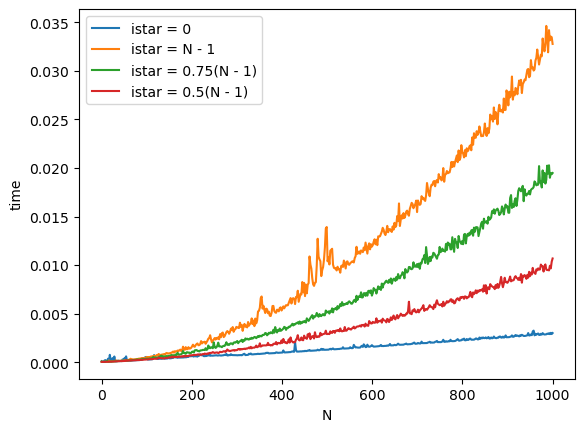

In [45]:
import numpy as np
times1 = part1_time(1000, 0)
times2 = part1_time(1000, 1)
times3 = part1_time(1000, 0.75)
times4 = part1_time(1000, 0.5)
fig, ax = plt.subplots(1, 1)
ax.plot(np.linspace(0, 1000, len(times1)), times1,  label = "istar = 0")
ax.plot(np.linspace(0, 1000, len(times2)), times2,  label = "istar = N - 1")
ax.plot(np.linspace(0, 1000, len(times3)), times3,  label = "istar = 0.75(N - 1)")
ax.plot(np.linspace(0, 1000, len(times4)), times4,  label = "istar = 0.5(N - 1)")
ax.legend(loc = "upper left")
plt.xlabel("N")
plt.ylabel("time")

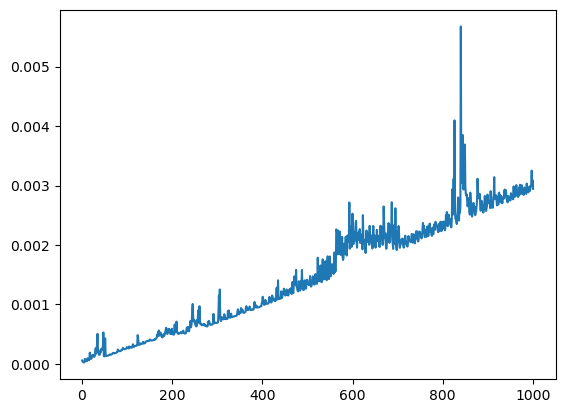

In [41]:
import time
fig, ax = plt.subplots(1, 1)
#fix istar as 0 and then as N-1
zeros = []
for i in range(1000):
    t1 = time.time()
    sorted = part1(np.random.randint(1, 1000, i), 0)
    t2 = time.time()
    zeros.append(t2 - t1)
x = np.linspace(1, 1000, 1000)
plt.plot(x, zeros)

In [78]:
#===== Code for Part 1=====#
def part1(Xin,istar):
    """
    Sort list of integers in non-decreasing order
    Input:
    Xin: List of N integers
    istar: integer between 0 and N-1 (0<=istar<=N-1)
    Output:
    X: Sorted list
    """ 
    X = Xin.copy() 
    for i,x in enumerate(X[1:],1):
        if i<=istar:
            ind = 0
            for j in range(i-1,-1,-1):
                if x>=X[j]:
                    ind = j+1
                    break                   
        else:
            a = 0
            b = i-1
            while a <= b:
                c = (a+b) // 2
                if X[c] < x:
                    a = c + 1
                else:
                    b = c - 1
            ind = a
        
        X[ind+1:i+1] = X[ind:i]
        X[ind] = x

    return X


def avgd_sample(N, coef,  n):
    #Function to take n number of samples and return the mean of them
    timer = 0
    for i in range(n):
        Xin = np.random.randint(1, 2*N, N)
        t1 = time.time()
        part1(Xin, coef * (N - 1))
        t2 = time.time()
        timer += t2 - t1
    return timer/n


def part1_time(n):
    """Examine dependence of walltimes of part1 function on N and istar
        You may modify the input/output as needed.
    """

    #Add code here for part 1, question 2
    import time
    import numpy as np
    import matplotlib.pyplot as plt
    
    #plot1 - fixed istar = 0, N-1 and 2 values in between, with lots of values being simulated, taking means
    x = np.arange(10, 1000, 10)
    t_0 = []
    t_5 = []
    t_75 = []
    t_1 = []
    for length in x:
        t_0.append(avgd_sample(length, 0, n))
        t_5.append(avgd_sample(length, 0.5, n))
        t_75.append(avgd_sample(length, 0.75, n))
        t_1.append(avgd_sample(length, 1, n))

    t_100 = []
    t_2000 = []
    t_500 = []
    t_1000 = []
    xx = np.arange(0, 1, 0.01)

    for coef in xx:
        t_100.append(avgd_sample(100, coef, n))
        t_500.append(avgd_sample(500, coef, n))
        t_1000.append(avgd_sample(1000, coef, n))
        t_2000.append(avgd_sample(2000, coef, n))


    fig, ax = plt.subplots(2, 2)
    fig.tight_layout(w_pad=2.5, h_pad=3.2)
    ax[0, 0].set_title('Figure 1')
    ax[0, 0].plot(x, t_0, label = 'istar = 0')
    ax[0, 0].plot(x, t_5, label = 'istar = 0.5(N-1)')
    ax[0, 0].plot(x, t_75, label = 'istar = 0.75(N-1)')
    ax[0, 0].plot(x, t_1, label = 'istar = N-1')
    ax[0, 0].set_xlabel("N")
    ax[0, 0].set_ylabel("Time (s)")
    ax[0, 0].legend(loc = "upper left")
    ax[0, 1].set_title('Figure 2')
    ax[0, 1].plot(x*np.log(x), t_0)
    ax[0, 1].set_xlabel("Nlog(N)")
    ax[0, 1].set_ylabel("Time (s)")
    ax[1, 0].set_title('Figure 3')
    ax[1, 0].plot(x**2, t_1)
    ax[1, 0].set_xlabel("N^2")
    ax[1, 0].set_ylabel("Time (s)")
    ax[1, 1].set_title('Figure 4')
    ax[1, 1].plot(xx, t_100, label = 'N = 100')
    ax[1, 1].plot(xx, t_500, label = 'N = 500')
    ax[1, 1].plot(xx, t_1000, label = 'N = 1000')
    ax[1, 1].plot(xx, t_2000, label = 'N = 2000')
    ax[1, 1].set_xlabel("istar/(N-1)")
    ax[1, 1].set_ylabel("Time (s)")
    ax[1, 1].legend(loc = "upper left")

    
    return None #Modify if needed

In [79]:
part1_time(100)